In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

Tasks
1) EDA: Check distribution, check correlations
3) LinearRegression: Test for LR conditions 1) Linearity: plot each var vs outcome 2) Multicollinearity: VIF; Parameter scaling
4) Analysis of the fit: Check the weights, check p-values in statsmodels,  3) Normality of residuals plot distr of residuals, 4) Homoscedasticity: yhat vs residuals 5) Autocorrelation ??, study of R2, adj R2

In [78]:
df=pd.read_csv('train.csv')

In [79]:
print(df.head())
print(df.shape)

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
(500, 9)


In [80]:
df=df.drop(columns='Serial No.')
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [81]:
df.columns=['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research','Chance_of_Admit']

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


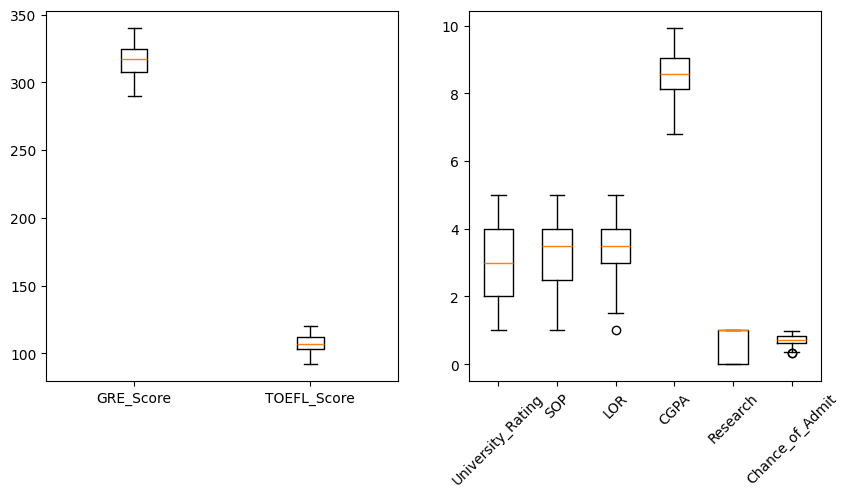

<Figure size 640x480 with 0 Axes>

In [83]:
sns.set_style()
#plt.boxplot(df,patch_artist=True,labels=df.columns)
#plt.xticks(rotation=45)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(10)

ax0.boxplot(df[['GRE_Score','TOEFL_Score']],labels=df.columns[0:2])
ax1.boxplot(df.iloc[:,2:],labels=df.columns[2:])
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()
#plt.figure(figsize=(20,6))

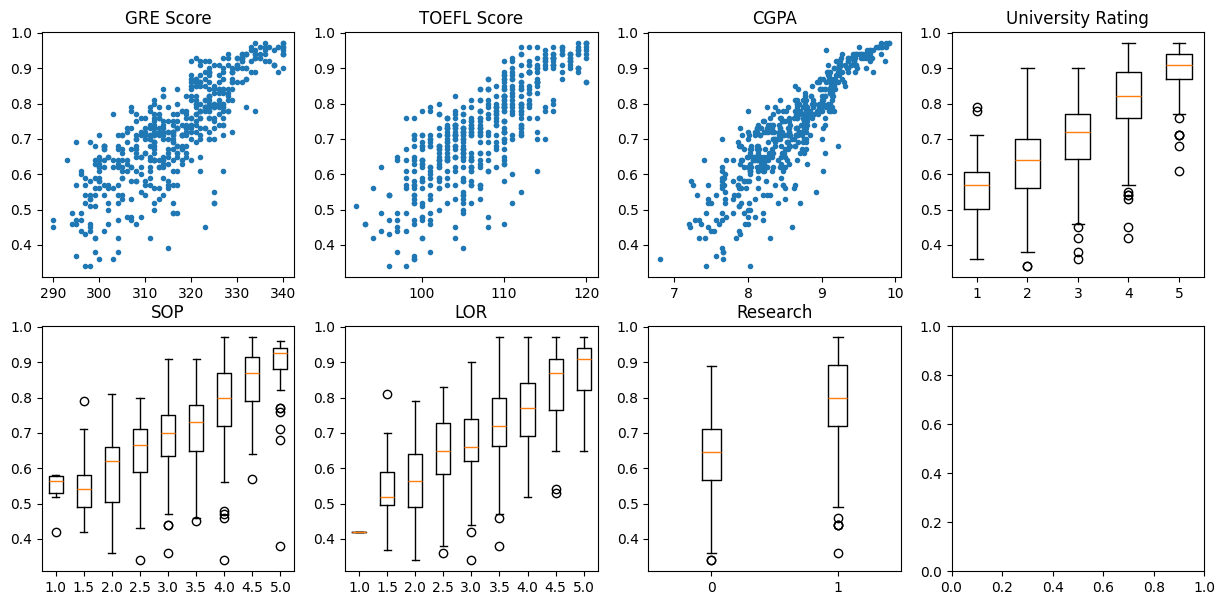

In [84]:
fig, ax = plt.subplots(nrows=2, ncols=4)

fig.set_figwidth(15)
fig.set_figheight(7)

ax[0,0].plot(df['GRE_Score'],df['Chance_of_Admit'],marker='.',linestyle='none')
ax[0,0].set_title('GRE Score')

ax[0,1].plot(df['TOEFL_Score'],df['Chance_of_Admit'],marker='.',linestyle='none')
ax[0,1].set_title('TOEFL Score')

ax[0,2].plot(df['CGPA'],df['Chance_of_Admit'],marker='.',linestyle='none')
ax[0,2].set_title('CGPA')

groups_by_Univ=df.groupby('University_Rating')['Chance_of_Admit'].apply(list)
ax[0,3].boxplot(groups_by_Univ,labels=np.unique(df.University_Rating))
ax[0,3].set_title('University Rating')

groups_by_SOP=df.groupby('SOP')['Chance_of_Admit'].apply(list)
ax[1,0].boxplot(groups_by_SOP,labels=np.unique(df.SOP))
ax[1,0].set_title('SOP')

groups_by_LOR=df.groupby('LOR')['Chance_of_Admit'].apply(list)
ax[1,1].boxplot(groups_by_LOR,labels=np.unique(df.LOR))
ax[1,1].set_title('LOR')

groups_by_Research=df.groupby('Research')['Chance_of_Admit'].apply(list)
ax[1,2].boxplot(groups_by_Research,labels=np.unique(df.Research))
ax[1,2].set_title('Research')

plt.show()

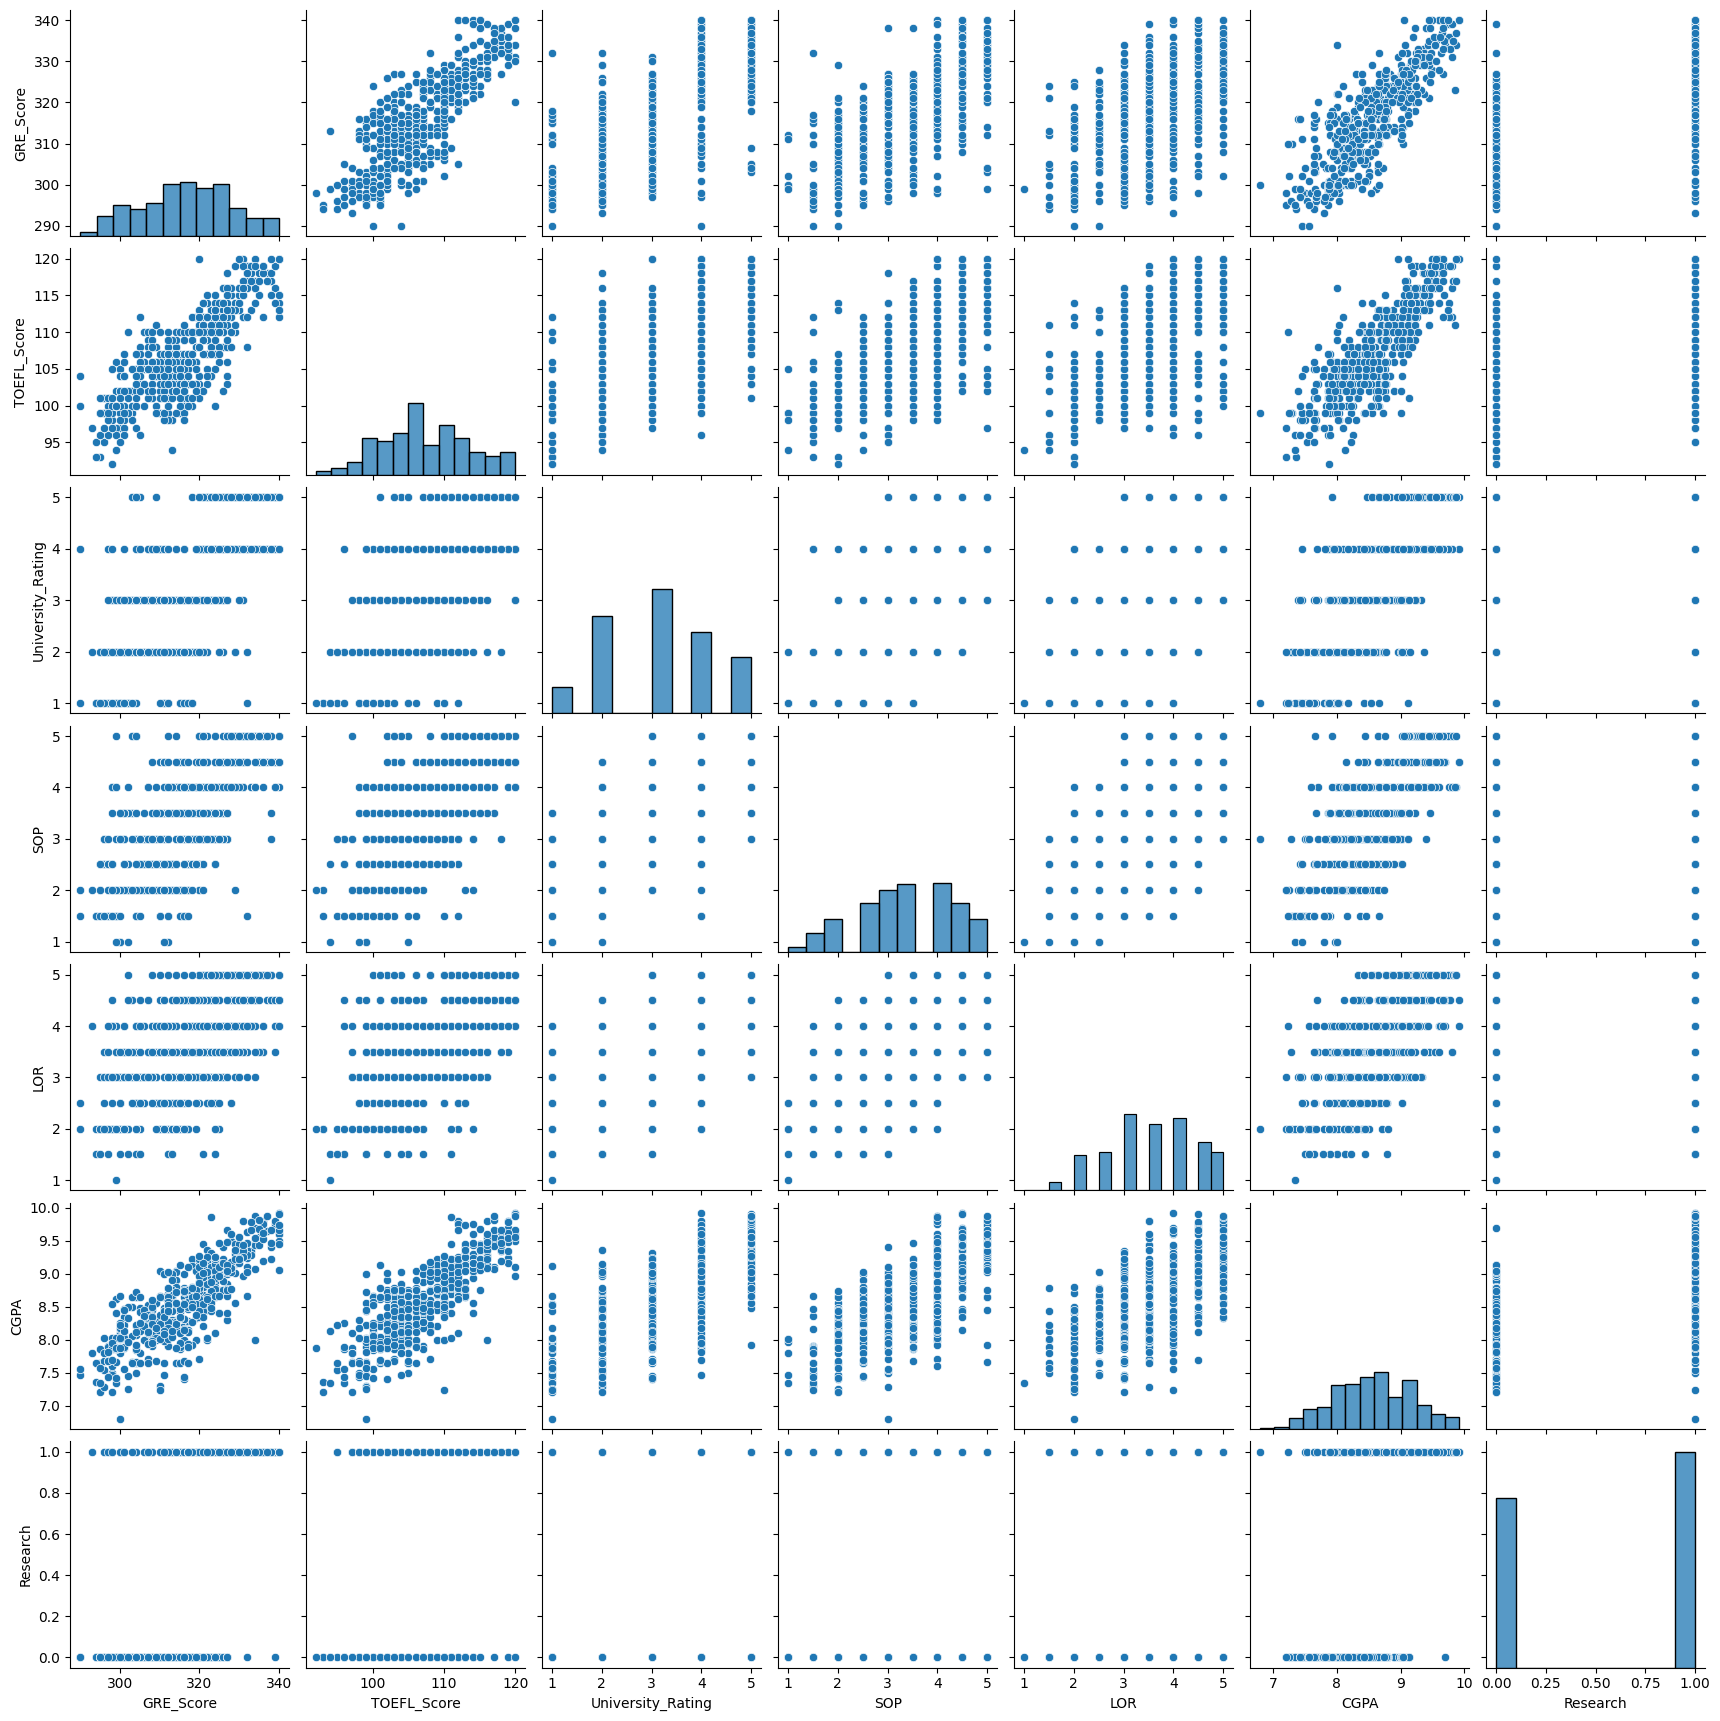

In [85]:
sns.pairplot(df.iloc[:,0:7])

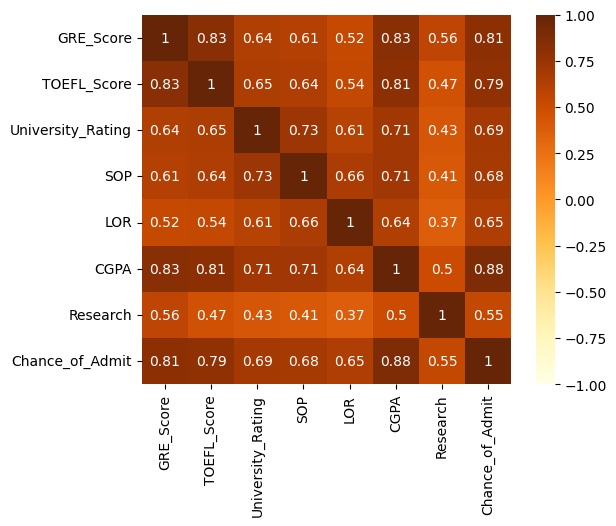

In [86]:
df.corr()

axis_corr = sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,square=True,cmap=sns.color_palette("YlOrBr", as_cmap=True),annot=True)

Regression


In [87]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm

X=df.iloc[:,0:7].to_numpy()
y=df[['Chance_of_Admit']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Data normalization

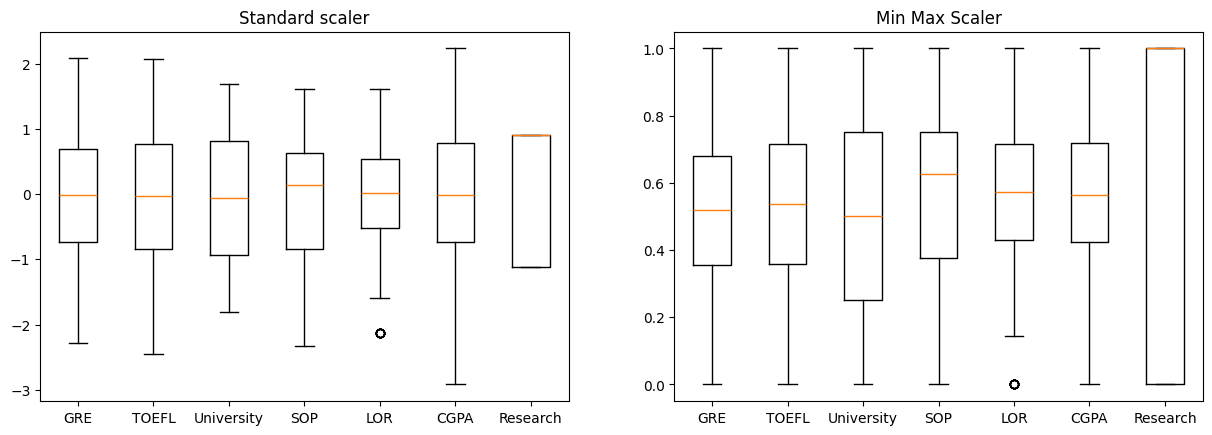

In [88]:
trans = MinMaxScaler()
trans_std=StandardScaler()
X_train_scaled_mms=trans.fit_transform(X_train)
X_train_scaled_std = trans_std.fit_transform(X_train)

# print(X_train_scaled)

fig,ax=plt.subplots(nrows=1,ncols=2)
fig.set_figwidth(15)

ax[0].boxplot(X_train_scaled_std,labels=['GRE','TOEFL','University','SOP','LOR','CGPA','Research'])
ax[0].set_title('Standard scaler')

ax[1].boxplot(X_train_scaled_mms,labels=['GRE','TOEFL','University','SOP','LOR','CGPA','Research'])
ax[1].set_title('Min Max Scaler')

plt.show()
# plt.tight_layout()

Analysis with min-max scaling

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1837.
Date:                Thu, 16 May 2024   Prob (F-statistic):                   9.34e-296
Time:                        23:23:02   Log-Likelihood:                          259.35
No. Observations:                 400   AIC:                                     -504.7
Df Residuals:                     393   BIC:                                     -476.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

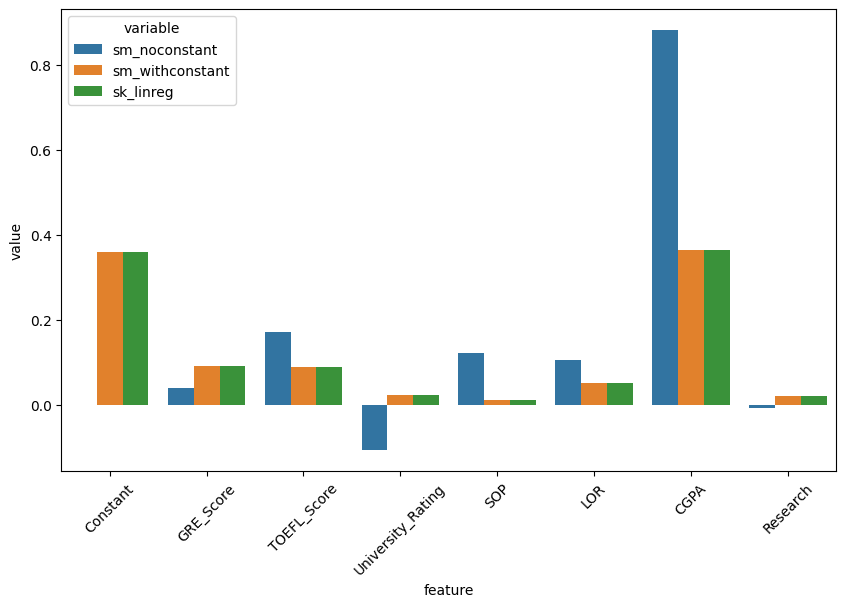

In [89]:

res_sm_noconstant = sm.OLS(y_train, X_train_scaled_mms).fit()
print(res_sm_noconstant.summary())   # Summarize model

X_train_scaled_withconst=sm.add_constant(X_train_scaled_mms)
res_sm_withconstant = sm.OLS(y_train, X_train_scaled_withconst).fit()
print(res_sm_withconstant.summary())   # Summarize model

res_sk=LinearRegression().fit(X_train_scaled_mms,y_train)
# print(res_sk.coef_)
# print(res_sk.intercept_)
# print(res_sk.score(X_train_scaled,y_train)) # Coeff of determination

# res_sk_L1=Ridge(alpha=0.5).fit(X_train_scaled,y_train)


# fig, ax=plt.subplots(nrows=1,ncols=2)

coeff_dict={'sm_noconstant':np.insert(res_sm_noconstant.params,0,0,axis=0),'sm_withconstant':res_sm_withconstant.params,
            'sk_linreg':np.insert(res_sk.coef_.T[:,0],0,res_sk.intercept_,axis=0),
            'feature':np.insert(df.columns[:7],0,'Constant',axis=0)}
coeff_df=pd.DataFrame.from_dict(coeff_dict)

# print(coeff_df)
plt.figure(figsize=(10,6))
sns.barplot(pd.melt(coeff_df,id_vars=['feature']),x='feature',y='value',hue='variable')
plt.xticks(rotation=45)
plt.show()


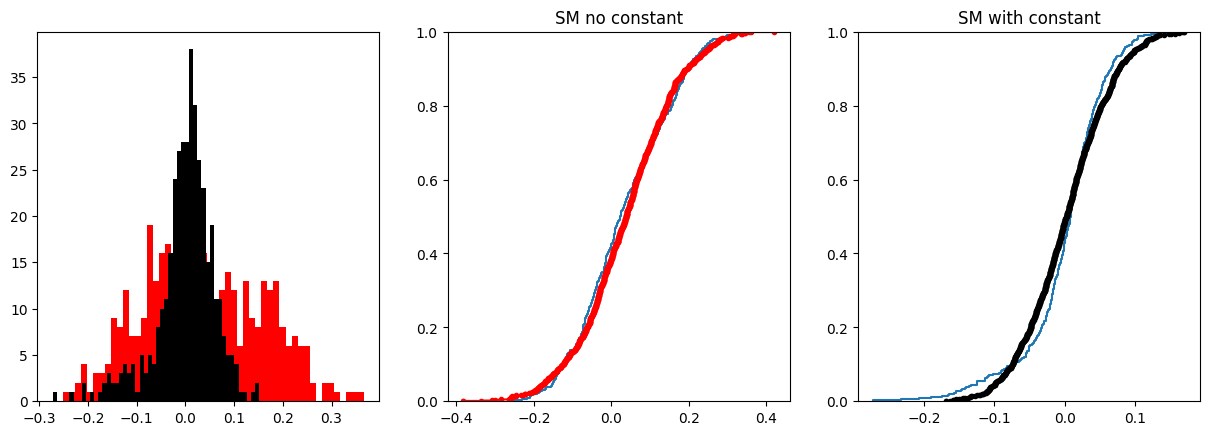

In [90]:

normdistr1 = np.random.normal(np.mean(res_sm_noconstant.resid), np.std(res_sm_noconstant.resid), 1000) 
normdistr2 = np.random.normal(np.mean(res_sm_withconstant.resid), np.std(res_sm_withconstant.resid), 1000) 

fig, ax=plt.subplots(nrows=1,ncols=3)
fig.set_figwidth(15)

ax[0].hist(res_sm_noconstant.resid,bins=50,color='r')
ax[0].hist(res_sm_withconstant.resid,bins=50,color='k')

ax[1].ecdf(res_sm_noconstant.resid)
ax[1].ecdf(normdistr1,marker='.',color='r')
ax[1].set_title('SM no constant');

ax[2].ecdf(res_sm_withconstant.resid)
ax[2].ecdf(normdistr2,marker='.',color='k')
ax[2].set_title('SM with constant');

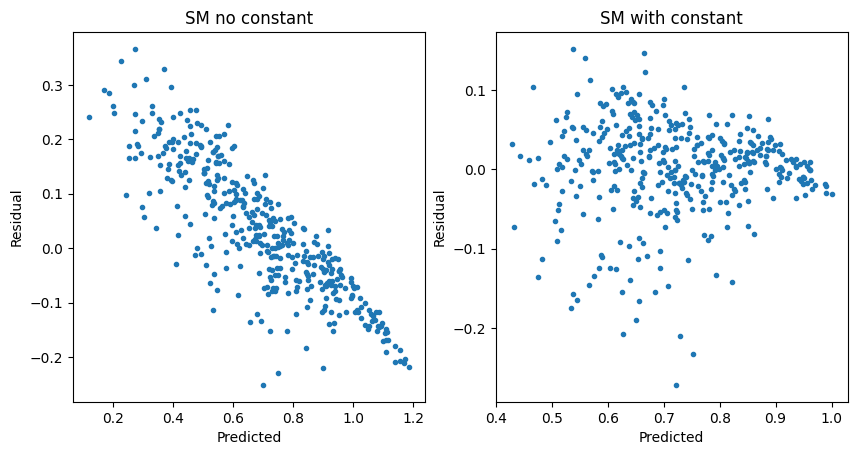

In [91]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(10)
ax[0].plot(res_sm_noconstant.fittedvalues,res_sm_noconstant.resid,marker='.',linestyle='none')
ax[0].set_title('SM no constant');
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Residual');

ax[1].plot(res_sm_withconstant.fittedvalues,res_sm_withconstant.resid,marker='.',linestyle='none')
ax[1].set_title('SM with constant')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Residual');



In [92]:
from sklearn.metrics import mean_squared_error

X_test_scaled_mms=trans.fit_transform(X_test)

mse_train=mean_squared_error(res_sm_noconstant.predict(X_train_scaled_mms),y_train)
print(mse_train)

mse_test=mean_squared_error(res_sm_noconstant.predict(X_test_scaled_mms),y_test)
print(mse_test)

mse_train=mean_squared_error(res_sk.predict(X_train_scaled_mms),y_train)
print(mse_train)

mse_test=mean_squared_error(res_sk.predict(X_test_scaled_mms),y_test)
print(mse_test)



0.016008985264524878
0.030084299700318385
0.0035733525638779674
0.003910462770456417


Analysis with standard scaling

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Thu, 16 May 2024   Prob (F-statistic):          2.10e-142
Time:                        23:23:03   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7209      0.003    238.778      0.0

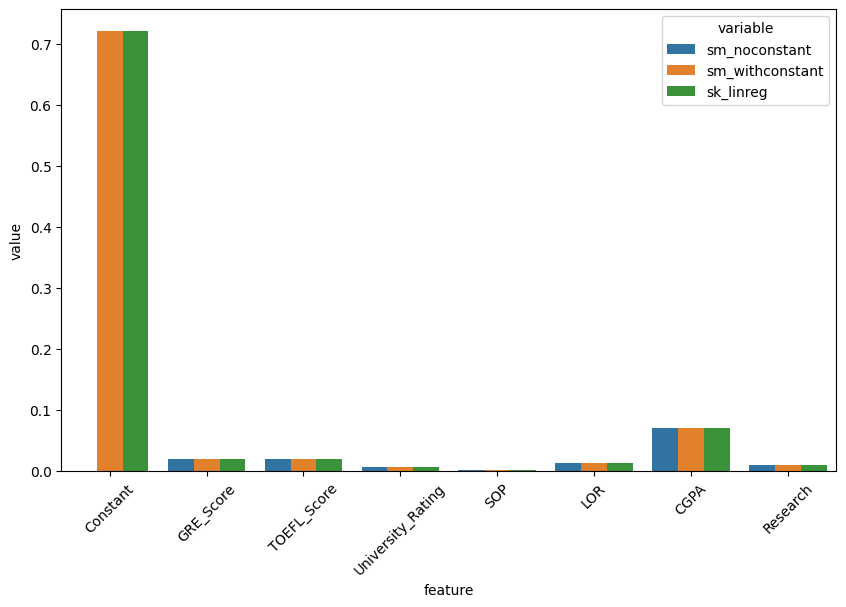

In [93]:

res_sm_noconstant = sm.OLS(y_train, X_train_scaled_std).fit()
# print(res_sm_noconstant.summary())   # Summarize model

X_train_scaled_withconst=sm.add_constant(X_train_scaled_std)
res_sm_withconstant = sm.OLS(y_train, X_train_scaled_withconst).fit()
print(res_sm_withconstant.summary())   # Summarize model

res_sk=LinearRegression().fit(X_train_scaled_std,y_train)
# print(res_sk.coef_)
# print(res_sk.intercept_)
# print(res_sk.score(X_train_scaled,y_train)) # Coeff of determination

# res_sk_L1=Ridge(alpha=0.5).fit(X_train_scaled,y_train)


# fig, ax=plt.subplots(nrows=1,ncols=2)

coeff_dict={'sm_noconstant':np.insert(res_sm_noconstant.params,0,0,axis=0),'sm_withconstant':res_sm_withconstant.params,
            'sk_linreg':np.insert(res_sk.coef_.T[:,0],0,res_sk.intercept_,axis=0),
            'feature':np.insert(df.columns[:7],0,'Constant',axis=0)}
coeff_df=pd.DataFrame.from_dict(coeff_dict)

# print(coeff_df)
plt.figure(figsize=(10,6))
sns.barplot(pd.melt(coeff_df,id_vars=['feature']),x='feature',y='value',hue='variable')
plt.xticks(rotation=45)
plt.show()


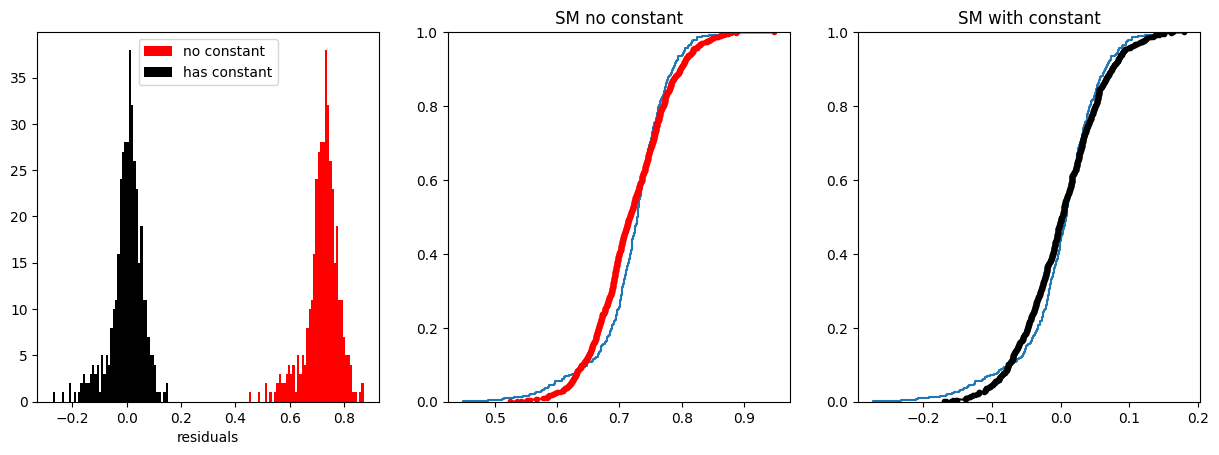

In [94]:

normdistr1 = np.random.normal(np.mean(res_sm_noconstant.resid), np.std(res_sm_noconstant.resid), 1000) 
normdistr2 = np.random.normal(np.mean(res_sm_withconstant.resid), np.std(res_sm_withconstant.resid), 1000) 

fig, ax=plt.subplots(nrows=1,ncols=3)
fig.set_figwidth(15)

ax[0].hist(res_sm_noconstant.resid,bins=50,color='r')
ax[0].hist(res_sm_withconstant.resid,bins=50,color='k')
ax[0].set_xlabel('residuals')
ax[0].legend(['no constant','has constant'])

ax[1].ecdf(res_sm_noconstant.resid)
ax[1].ecdf(normdistr1,marker='.',color='r')
ax[1].set_title('SM no constant');

ax[2].ecdf(res_sm_withconstant.resid)
ax[2].ecdf(normdistr2,marker='.',color='k')
ax[2].set_title('SM with constant');

# print(['mean = ',np.mean(res.resid), ' std dev = ',np.std(res.resid)])


Text(0, 0.5, 'Residual')

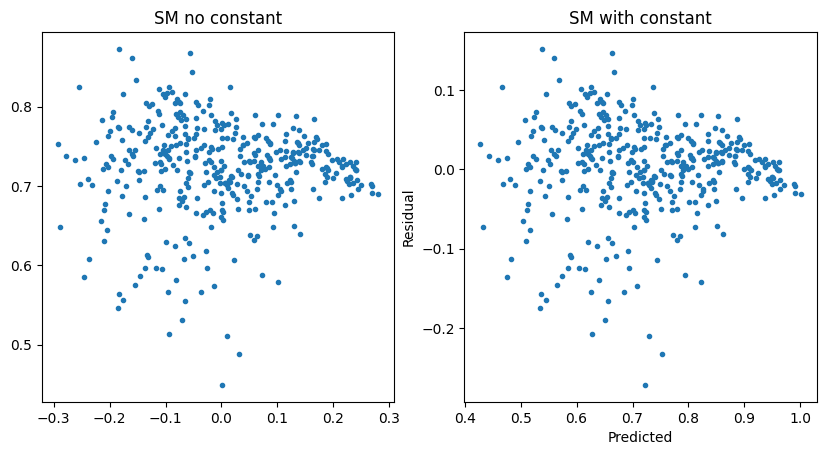

In [95]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(10)
ax[0].plot(res_sm_noconstant.fittedvalues,res_sm_noconstant.resid,marker='.',linestyle='none')
ax[0].set_title('SM no constant');

ax[1].plot(res_sm_withconstant.fittedvalues,res_sm_withconstant.resid,marker='.',linestyle='none')
ax[1].set_title('SM with constant')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Residual')

In [96]:
X_test_scaled_std=trans_std.fit_transform(X_test)

In [97]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

mse_train=mean_squared_error(res_sk.predict(X_train_scaled_std),y_train)
rmse_train=root_mean_squared_error(res_sk.predict(X_train_scaled_std),y_train)
print(np.round(mse_train,4))
print(np.round(rmse_train,4))

mse_test=mean_squared_error(res_sk.predict(X_test_scaled_std),y_test)
rmse_test=root_mean_squared_error(res_sk.predict(X_test_scaled_std),y_test)
print(np.round(mse_test,4))
print(np.round(rmse_test,4))



0.0036
0.0598
0.0034
0.0586
